# Chapter 18: Intervals

Intervals, or **distances** in pitch space between two pitches, are fundamental concepts of music theory.

This chapter of the User’s Guide explains how to create and use Interval objects.

In [1]:
from music21 import *

## The *Interval* Class

create an *Interval* object by giving an abbreviation for the interval as a string

In [2]:
#  if we want to model a perfect fifth(纯五度), we’ll use the string "P5"
i = interval.Interval('P5')
i

<music21.interval.Interval P5>

Now we can see some properties of Interval objects

In [3]:
i.niceName

'Perfect Fifth'

In [4]:
i.semitones

7

In [5]:
# step :  the interval between two consecutive scale degrees
i.isStep

False

What do we need to make this interval add up to an octave? That's the **complement**

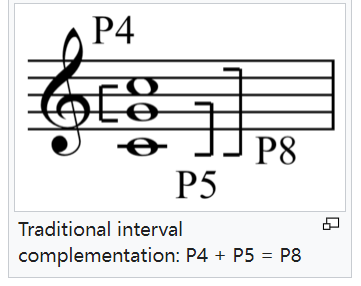

In [6]:
i.complement

<music21.interval.Interval P4>

In [7]:
i.intervalClass

5

A cent(音分) is 1/100th of a semitone(半音)

In [8]:
i.cents

700.0

In [10]:
# We can get a descending form of the Interval
i.reverse()

<music21.interval.Interval P-5>

In [12]:
i.noteStart = note.Note('B4')
i.noteEnd

<music21.note.Note F#>

we can use this interval to transpose any given Note

In [13]:
i.transposeNote(note.Note('C5'))

<music21.note.Note G>

Or we can use intervals to transpose pitches

In [14]:
i.transposePitch(pitch.Pitch('C5'))

<music21.pitch.Pitch G5>

*.transpose()* method takes *Interval* objects as arguments

In [15]:
pitch.Pitch('E3').transpose(i)

<music21.pitch.Pitch B3>

In [16]:
chord.Chord("F A C").transpose(i)

<music21.chord.Chord C E G>

In [17]:
s = converter.parse('tinyNotation: 4/4 c4 d e8 f# g4')
s2 = s.transpose(i)
s2.show('xml')

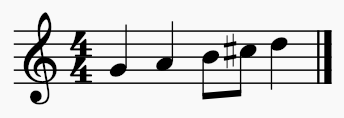

All intervals have properties called “simpleName” and “semiSimpleName” for reducing compound intervals (those over an octave) to smaller forms

In [18]:
i2 = interval.Interval('P-12')
i2.simpleName

'P5'

In [19]:
i2.directedSimpleName

'P-5'

In [20]:
p8 = interval.Interval('P8')
m10 = interval.Interval('m10')
(p8.simpleNiceName, m10.simpleNiceName)

('Perfect Unison', 'Minor Third')

Note that capitalization makes a difference in determining Major and minor

In [21]:
interval.Interval('m3').niceName

'Minor Third'

In [22]:
interval.Interval('M3').niceName

'Major Third'

Creating diminished(减) and Augmented(增) intervals

In [23]:
interval.Interval('d5').niceName

'Diminished Fifth'

In [24]:
interval.Interval('A4').niceName

'Augmented Fourth'

multiple letters can get certain obscure intervals

In [25]:
for intName in ['d5', 'dd5', 'ddd5', 'A4', 'AA4', 'AAA4']:
    iTemp = interval.Interval(intName)
    print(iTemp.niceName)

Diminished Fifth
Doubly-Diminished Fifth
Triply-Diminished Fifth
Augmented Fourth
Doubly-Augmented Fourth
Triply-Augmented Fourth


## Other ways of constructing Interval objects

Create interval when you don't know the interval's name in advance

In [26]:
e = note.Note('E4')
a = note.Note('A4')
p4 = interval.Interval(e, a)
p4.niceName

'Perfect Fourth'

you can create intervals from an integer, representing the number of half-steps

In [27]:
interval.Interval(7)

<music21.interval.Interval P5>

In [28]:
for semitones in range(14):
    tempInt = interval.Interval(semitones)
    print(semitones, tempInt.niceName)

0 Perfect Unison
1 Minor Second
2 Major Second
3 Minor Third
4 Major Third
5 Perfect Fourth
6 Diminished Fifth
7 Perfect Fifth
8 Minor Sixth
9 Major Sixth
10 Minor Seventh
11 Major Seventh
12 Perfect Octave
13 Minor Ninth


We can create new intervals by adding existing Intervals together

In [29]:
i1 = interval.Interval('P5')
i2 = interval.Interval('M3')
i3 = interval.add([i1, i2])
i3

<music21.interval.Interval M7>

Here’s a nice way of making sure that a **major scale** actually does repeat at an **octave**

In [30]:
# and a demo that “W” and “H” are synonyms for whole and half steps
interval.add(["W", "W", "H", "W", "W", "W", "H"])

<music21.interval.Interval P8>

We can create new intervals by subtracting old ones

In [31]:
interval.subtract([i1, i2])

<music21.interval.Interval m3>

Subtraction, of course, is not commutative(可交换的)

In [32]:
iDown = interval.subtract([i2, i1])
iDown.directedNiceName

'Descending Minor Third'

know the range from the lowest to the highest note in a piece

In [34]:
s = converter.parse('4/4 c4 d e f# g# a# g f e1', format="tinyNotation")
s.show('xml')

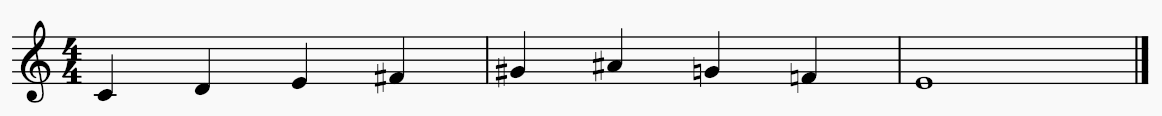

In [35]:
s.analyze('range')

<music21.interval.Interval A6>

In [36]:
a6 = s.analyze('range')
a6.semitones

10

## Related Interval Classes

the *GenericInterval* part is omitted ! 